# CS156 Final assignment

# Natural language processing with comic transcript

## Overview

In this assignment, I'm classifying sentiments from comic transcripts with machine learning model.

## Data

The comic transcripts are from https://scrapsfromtheloft.com/. There are 10 comedians with 10 transcripts from their Netflix special. I divided each script into 200 smaller equal pieces of text, and labeled them into "Positive", "Neutral", and "Negative" sentiment using TextBlob.

I could have divided the script into individual sentences, but that would result in (1) unequal data training from each comedian and (2) more computational resource requirement in training the model.

## Approach

1. I scraped the data from the website, did some text processing and data exploration.
2. Then I tokenized the scripts into bag of words that denotes the vocabulary used by the comics. This was done by either Count Vectorizer or TF-IDF Vectorizer.
3. I used Neural Network (for only Count Vectorizer) and Logistic Regression (for both Count Vectorizer and TF-IDF Vectorizer) to classify the data. 

## Result

Here are the performance of the model:

- Neural Network: 64.17% (with Count Vectorizer)

- Logistic Regression: 62% (with Count Vectorizer) and 61.5% (with TF-IDF Vectorizer)

It seems like both models have comparable performance, around 60%, but they are heavily overfitted because the training data (with Count Vectorizer) for both models result in 100% accuracy. There must be some way to prevent overfitting (like doing image augmentation with images data), but as I'm not super familiar with text data, I was not able to prevent overfitting.

I also couldn't use TF-IDF Vectorizer to work with Neural Network because of some formatting issue. Otherwise, I would have been a meaningful comparison.

## References

The code is adapted from these 2 tutorials: [Natural language processing in Python](https://www.youtube.com/watch?v=xvqsFTUsOmc), and [A guide to text classification and sentiment analysis](https://towardsdatascience.com/a-guide-to-text-classification-and-sentiment-analysis-2ab021796317)


# Getting the data

In [1]:
# Data scraping
from bs4 import BeautifulSoup
import requests
import pickle

# Data cleaning
import pandas as pd
import re
import string

In [2]:
# Function to scrape data
def url_to_transcript(url):
    '''Scrape transcript data from URL'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="site-content").find_all('p')]
    print(f"Getting data from: {url}")
    return text

In [3]:
# URLs of transcripts
urls = ['http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/']

# Scrape the transcripts and put them into a list
transcripts = [url_to_transcript(u) for u in urls]

Getting data from: http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
Getting data from: http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
Getting data from: http://scrapsfromtheloft.co

In [4]:
# Organize data according to comedians
comedians = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Dave Chappelle',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data = {}

for i, c in enumerate(comedians):
    print(c, transcripts[i])
    data[c] = transcripts[i]

Ali Wong ['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.', 'Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, the

In [5]:
# Check the data
data.keys()

dict_keys(['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Dave Chappelle', 'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais'])

In [6]:
# Check the data
data['John Mulaney']

['Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he met Bill Clinton',
 'All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see you again. Thank you. That was very nice. Thank you. Look, now, you’re a wonderful crowd, but I need you to keep your energy up the entire show, okay? Because… No, no, no. Thank you. Some crowds… some crowds, they have big energy in the beginning and then they run out of places to go. So… I don’t judge those crowds, by the way, okay? We’ve all gone too big too fast and then run out of room. We’ve all made a “Happy Birthday” sign… Wait. You get that poster board up, and you’re like, “I don’t need to trace it. I know how big letters should be. To begin with, a big-ass ‘H’. Followed by a big-ass ‘A’ and… Oh, no! Oh, God! Okay, all right. Real skinny ‘P’ with a high hump, and then we

# Cleaning the data

In [7]:
# Current format of the dictionary: "comedian": ["text1", "text2", ..] (key: comedian, value: list of small text)
# Let's change it to: "comedian": ["large text"] (key: comedian, value: list of all text)
data_combined = {comedian: ["".join(list_of_text)] for (comedian, list_of_text) in data.items()}
data_combined

{'Ali Wong': ["Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, the

In [8]:
# Let's transform the data into a pandas dataframe
pd.set_option('max_colwidth',180)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Ali Wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’c..."
Anthony Jeselnik,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said,..."
Bill Burr,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a pleasure to be here in the gre..."
Dave Chappelle,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the alchemist’s fire that transfor..."
Jim Jefferies,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello! Sit down, sit down, sit down..."
Joe Rogan,"[rock music playing][audience cheering][announcer]Ladies and gentlemen, welcome Joe Rogan.[audience cheering and applauding]What the f*ck is going on, San Francisco? Thanks for..."
John Mulaney,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he met Bill ClintonAll right, Petu..."
Louis C.K.,"Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciat..."
Mike Birbiglia,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So about five years ago, pretty m..."
Ricky Gervais,"Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonight. You’re thinking, “Relax, we..."


In [9]:
# Let's take a closer look at John Mulaney's transcript
data_df.transcript.loc['John Mulaney']

"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he met Bill ClintonAll right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see you again. Thank you. That was very nice. Thank you. Look, now, you’re a wonderful crowd, but I need you to keep your energy up the entire show, okay? Because… No, no, no. Thank you. Some crowds… some crowds, they have big energy in the beginning and then they run out of places to go. So… I don’t judge those crowds, by the way, okay? We’ve all gone too big too fast and then run out of room. We’ve all made a “Happy Birthday” sign… Wait. You get that poster board up, and you’re like, “I don’t need to trace it. I know how big letters should be. To begin with, a big-ass ‘H’. Followed by a big-ass ‘A’ and… Oh, no! Oh, God! Okay, all right. Real skinny ‘P’ with a high hump, and then we’ll pu

In [10]:
# Let's clean up the text
def clean_text(text):
    '''
    Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.
    Get rid of additional punctuation and non-sensical text.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaning = lambda x: clean_text(x)

In [11]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(cleaning))
data_clean

,transcript
Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have ...
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special in san francisco said why woul...
Bill Burr,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the greater atlanta georgia area this o...
Dave Chappelle,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alchemists fire that transforms fe...
Jim Jefferies,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appreciate that uh thats very swee...
Joe Rogan,ladies and gentlemen welcome joe roganwhat the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down fckface i see you btch put your phon...
John Mulaney,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met bill clintonall right petunia w...
Louis C.K.,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much w...
Mike Birbiglia,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us were here this is crazy its insane so about five years ago pretty much everyone who ...
Ricky Gervais,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thinking relax weve had our money...


# Organizing the data

## Document-term matrix

In [12]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,...,ze,zealand,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Ali Wong,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
Anthony Jeselnik,0,0,0,0,0,0,0,0,0,2,...,0,10,0,0,0,0,0,0,0,0
Bill Burr,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,1,1,0,0
Dave Chappelle,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jim Jefferies,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
Joe Rogan,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
John Mulaney,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
Louis C.K.,0,0,3,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
Mike Birbiglia,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
Ricky Gervais,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,0,0,0,0,1,0


# Exploratory Data Analysis
## Most common words

In [13]:
# Read in the document-term matrix
import copy

data = copy.deepcopy(data_dtm)
data = data.transpose()
data.head()

,Ali Wong,Anthony Jeselnik,Bill Burr,Dave Chappelle,Jim Jefferies,Joe Rogan,John Mulaney,Louis C.K.,Mike Birbiglia,Ricky Gervais
aaaaah,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,1,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,3,0,0
abc,1,0,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0,0


In [14]:
# Find the top 10 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words]))
    print('---')

Ali Wong
like, im, just, know, dont, thats, shit, youre, gonna, ok, lot, wanna, oh, gotta, husband, right, got, time, cause, day, women, pregnant, people, god, need, hes, yeah, tell, theyre, dude
---
Anthony Jeselnik
im, like, know, dont, joke, got, said, thats, anthony, day, say, just, guys, people, tell, youre, grandma, right, time, thing, think, did, jokes, school, good, ive, yeah, gonna, baby, okay
---
Bill Burr
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, want, fuck, think, people, hes, did, guy, didnt, make, come, thing, going, theyre, theres, let, doing
---
Dave Chappelle
like, know, said, just, im, shit, people, didnt, dont, ahah, time, thats, fuck, fucking, black, man, got, good, right, gonna, gay, lot, did, hes, oh, oj, yeah, come, kevin, guys
---
Jim Jefferies
like, im, dont, right, fucking, went, know, just, youre, people, thats, day, oh, going, think, fuck, goes, thing, said, guns, theyre, good, ive, got, cause, theres, women, wan

In [15]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'right',
 'got',
 'time',
 'cause',
 'day',
 'women',
 'pregnant',
 'people',
 'god',
 'need',
 'hes',
 'yeah',
 'tell',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'thing',
 'think',
 'did',
 'jokes',
 'school',
 'good',
 'ive',
 'yeah',
 'gonna',
 'baby',
 'okay',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'fuck',
 'think',
 'people',
 'hes',
 'did',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'theres',
 'let',
 'doing',
 'like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'people',
 'didnt',
 'dont',
 'ahah',
 'time',
 'thats',
 'fuck',
 'fucking',
 'black',
 'man',
 'got',
 'go

In [16]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'think']

In [17]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
# data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# # Recreate document-term matrix
# cv = CountVectorizer(stop_words=stop_words)
# data_cv = cv.fit_transform(data_clean.transcript)
# data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_stop.index = data_clean.index

# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [18]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

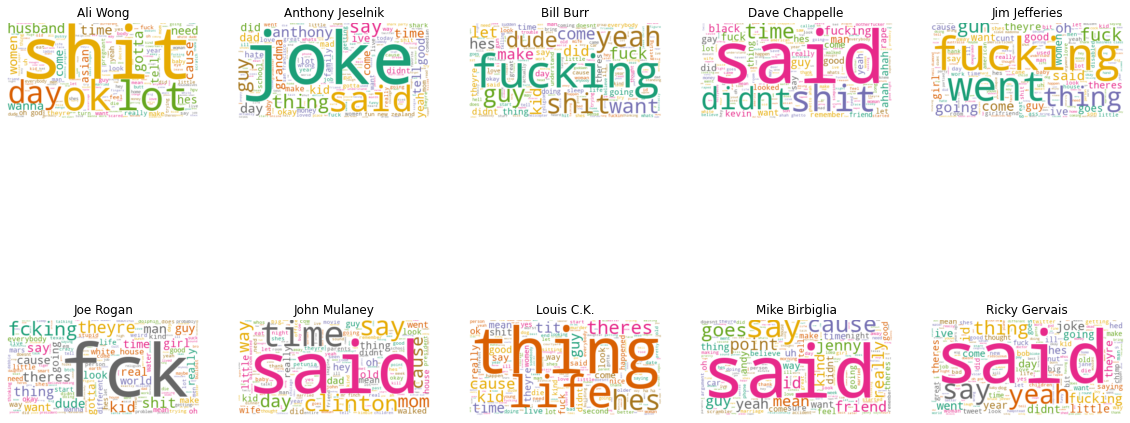

In [19]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Dave Chappelle', 'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(2, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedians[index])
    
plt.show()

# Sentiment Analysis
## Sentiment of Routine

In [20]:
# Let's get our clean data
data = copy.deepcopy(data_clean)
data

,transcript
Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have ...
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special in san francisco said why woul...
Bill Burr,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the greater atlanta georgia area this o...
Dave Chappelle,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alchemists fire that transforms fe...
Jim Jefferies,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appreciate that uh thats very swee...
Joe Rogan,ladies and gentlemen welcome joe roganwhat the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down fckface i see you btch put your phon...
John Mulaney,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met bill clintonall right petunia w...
Louis C.K.,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much w...
Mike Birbiglia,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us were here this is crazy its insane so about five years ago pretty much everyone who ...
Ricky Gervais,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thinking relax weve had our money...


In [21]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data['full_name'] = comedians
data

,transcript,polarity,subjectivity,full_name
Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have ...,0.066919,0.479126,Ali Wong
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special in san francisco said why woul...,0.048833,0.560856,Anthony Jeselnik
Bill Burr,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the greater atlanta georgia area this o...,0.008194,0.543606,Bill Burr
Dave Chappelle,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alchemists fire that transforms fe...,-0.003324,0.513580,Dave Chappelle
Jim Jefferies,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appreciate that uh thats very swee...,0.038305,0.537510,Jim Jefferies
Joe Rogan,ladies and gentlemen welcome joe roganwhat the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down fckface i see you btch put your phon...,0.077798,0.535533,Joe Rogan
John Mulaney,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met bill clintonall right petunia w...,0.075383,0.489224,John Mulaney
Louis C.K.,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much w...,0.053691,0.522062,Louis C.K.
Mike Birbiglia,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us were here this is crazy its insane so about five years ago pretty much everyone who ...,0.081389,0.524935,Mike Birbiglia
Ricky Gervais,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thinking relax weve had our money...,0.052739,0.507312,Ricky Gervais


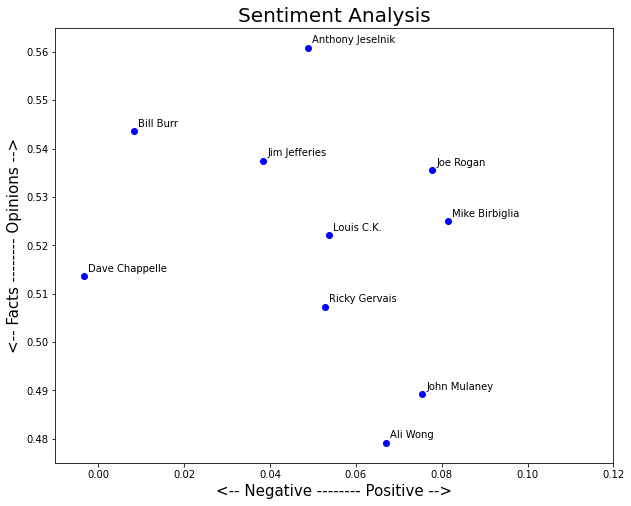

In [22]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of routine over time

In [23]:
# Show length of the script for each
for index, row in data.iterrows():
    print(row["full_name"], len(row["transcript"]))

Ali Wong 37234
Anthony Jeselnik 33134
Bill Burr 60485
Dave Chappelle 45718
Jim Jefferies 54104
Joe Rogan 50046
John Mulaney 46003
Louis C.K. 37139
Mike Birbiglia 55695
Ricky Gervais 53368


In [24]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=200):
    '''
    Takes in a string of text and splits into n equal parts, with a default of 200 equal parts.
    With a total length of script from 30,000 to 60,000 characters, we are looking at 150 to 300 characters per chunk. 
    '''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [25]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity,full_name
Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have ...,0.066919,0.479126,Ali Wong
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special in san francisco said why woul...,0.048833,0.560856,Anthony Jeselnik
Bill Burr,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the greater atlanta georgia area this o...,0.008194,0.543606,Bill Burr
Dave Chappelle,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alchemists fire that transforms fe...,-0.003324,0.513580,Dave Chappelle
Jim Jefferies,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appreciate that uh thats very swee...,0.038305,0.537510,Jim Jefferies
Joe Rogan,ladies and gentlemen welcome joe roganwhat the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down fckface i see you btch put your phon...,0.077798,0.535533,Joe Rogan
John Mulaney,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met bill clintonall right petunia w...,0.075383,0.489224,John Mulaney
Louis C.K.,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much w...,0.053691,0.522062,Louis C.K.
Mike Birbiglia,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us were here this is crazy its insane so about five years ago pretty much everyone who ...,0.081389,0.524935,Mike Birbiglia
Ricky Gervais,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thinking relax weve had our money...,0.052739,0.507312,Ricky Gervais


In [26]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces += split
    
list_pieces

['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in ',
 'like ten minutes but thank you everybody so much for comingum its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i apprecia',
 'te that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im je',
 'alous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clear',
 'ance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they do',
 'nt have insomnia yet they dont know what it

In [27]:
# The list has been broken down to 2000 transcripts
len(list_pieces)

2000

In [29]:
# Create list of comedian names

def create_big_list(list_of_names, n=200):
    big_list = []
    for name in list_of_names:
        small_list = [name for i in range(n)]
        big_list += small_list
    return big_list

comedians = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Dave Chappelle', 'Jim Jefferies',
             'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

comedians_list = create_big_list(comedians)
print(len(comedians_list))
print(comedians_list[:5])

2000
['Ali Wong', 'Ali Wong', 'Ali Wong', 'Ali Wong', 'Ali Wong']


In [30]:
# Calculate the polarity for each piece of text

NEUTRAL = "neutral"
POSITIVE = "positive"
NEGATIVE = "negative"

polarity_scores = []
sentiment_labels = []
sentiment_nums = []

for lp in list_pieces:
    polarity_score = TextBlob(lp).sentiment.polarity
    if -0.2 <= polarity_score <= 0.2:
        label = NEUTRAL
        num = 1
    elif polarity_score > 0.2:
        label = POSITIVE
        num = 2
    else:
        label = NEGATIVE 
        num = 0

    polarity_scores.append(polarity_score)
    sentiment_labels.append(label)
    sentiment_nums.append(num)

# Take a peek at it
print(len(polarity_scores))
print(polarity_scores[:10])
print("----------")
print(len(sentiment_labels))
print(sentiment_labels[:10])

2000
[0.46666666666666673, 0.24500000000000002, -0.16666666666666669, 0.15510204081632653, 0.27142857142857146, 0.30000000000000004, 0.39999999999999997, -0.15714285714285714, -0.6, 0.4214285714285714]
----------
2000
['positive', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'negative', 'positive']


In [31]:
print(list_pieces[0])
print(list_pieces[1])
print(list_pieces[2])
print(list_pieces[3])

ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in 
like ten minutes but thank you everybody so much for comingum its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i apprecia
te that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im je
alous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clear


In [32]:
# Put all of them together
new_data_df = pd.DataFrame(comedians_list, columns =['full_name'])
new_data_df["splitted_transcript"] = list_pieces
new_data_df["sentiment"] = sentiment_labels
new_data_df["y"] = sentiment_nums
new_data_df["score"] = polarity_scores
new_data_df

,full_name,splitted_transcript,sentiment,y,score
0,Ali Wong,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have ...,positive,2,0.466667
1,Ali Wong,like ten minutes but thank you everybody so much for comingum its a very exciting day for me its been a very exciting year for me i turned this year yes thank you five people ...,positive,2,0.245000
2,Ali Wong,te that uh i can tell that im getting older because now when i see an girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jea...,neutral,1,-0.166667
3,Ali Wong,alous first and foremost of their metabolism because girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner t...,neutral,1,0.155102
4,Ali Wong,ance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep rig...,positive,2,0.271429
...,...,...,...,...,...
1995,Ricky Gervais,ou think of something funny youve got to say it win lose or draw it might go well it might go badly but youve gotta say it and bear that in mind as i leave you with this right ...,neutral,1,0.089643
1996,Ricky Gervais,ach we get stopped for a security check and theres a british bobby there and he stops the car bobs at the window he said where are we off to bob went bognor he went can you jus...,neutral,1,0.000000
1997,Ricky Gervais,gets that mirror on a stick thing and he starts just looking under the car and as he does that his helmet falls off right and out of the helmet falls a packet of cigarettes an...,positive,2,0.285714
1998,Ricky Gervais,ew it wasnt fucking brains youve been amazing good nightprolefeedyour email address will not be published required fields are marked nameemailwebsite an interview with a sick c...,neutral,1,-0.029422


In [33]:
# Prepare data for classification
X = new_data_df["splitted_transcript"].values
Y = new_data_df["y"].values

In [34]:
# Split data to train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
vec.fit(X_train)
x_train=vec.transform(X_train)
x_test=vec.transform(X_test)

In [59]:
Y_train.shape

(1400, 1)

In [60]:
x_train

<1400x6296 sparse matrix of type '<class 'numpy.int64'>'
	with 49805 stored elements in Compressed Sparse Row format>

In [61]:
# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# Train and test with Neural Network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               629700    
                                                                 
 dense_7 (Dense)             (None, 32)                3232      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 633,031
Trainable params: 633,031
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [64]:
model.fit(x_train, Y_train, epochs=10,verbose=True,batch_size=16)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


88/88 [==============================] - 2s 15ms/step - loss: 0.8994 - accuracy: 0.6279
Epoch 2/10
88/88 [==============================] - 1s 11ms/step - loss: 0.4734 - accuracy: 0.7950
Epoch 3/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1137 - accuracy: 0.9779
Epoch 4/10
88/88 [==============================] - 1s 14ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 5/10
88/88 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 6/10
88/88 [==============================] - 1s 14ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/10
88/88 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
88/88 [==============================] - 1s 13ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
88/88 [==============================] - 1s 13ms/step - loss: 8.2659e-04 - accuracy: 1.0000
Epoch 10/10
88/88 [==============================] - 1s 10ms/step - loss: 6.2602e-04 - accuracy: 1.0000


In [65]:
model.evaluate(x_train,Y_train)

44/44 [==============================] - 0s 2ms/step - loss: 5.2160e-04 - accuracy: 1.0000


[0.0005215982091613114, 1.0]

In [66]:
model.evaluate(x_test,Y_test)

19/19 [==============================] - 0s 3ms/step - loss: 1.4864 - accuracy: 0.6417


[1.4863659143447876, 0.6416666507720947]

In [69]:
# Train and test with Logistics Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(x_train, Y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [70]:
lr.score(x_train, Y_train)

1.0

In [71]:
lr.score(x_test, Y_test)

0.62

## TF-IDF Vectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(X_train)

TfidfVectorizer()

In [73]:
x_train=vec.transform(X_train)
x_test=vec.transform(X_test)
x_train

<1400x6296 sparse matrix of type '<class 'numpy.float64'>'
	with 49805 stored elements in Compressed Sparse Row format>

In [74]:
# Train and test with Logistics Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(x_train, Y_train.ravel())

LogisticRegression()

In [75]:
lr.score(x_train, Y_train)

0.7828571428571428

In [76]:
lr.score(x_test, Y_test)

0.615